# Laboratorio Clustering

## Clusterin Sin Signal

In [135]:
#Zona de importaciones
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

### K-Means

In [88]:
#Importando los datos
sindata = pd.read_excel('Sin2.xlsx')
sindata.head()

,58882,63168
0,58959,63322
1,59034,60585
2,59145,61717
3,59164,59757
4,59168,61401


In [90]:
#Normalizamos los datos
sindata = StandardScaler().fit_transform(sindata)

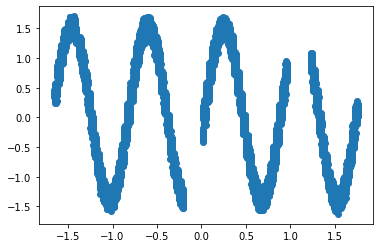

In [91]:
#Visualizando el Dataset
plt.scatter(sindata[:,0],sindata[:,1])
plt.show()

In [92]:
#Realizamos el ajusste para K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(sindata)

In [93]:
#Revisamos los grupos formados
y_kmeans

array([0, 0, 0, ..., 2, 2, 2])

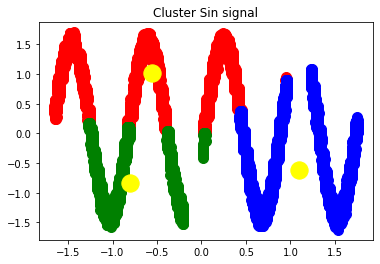

In [72]:
#Visualizamos los clusters
plt.scatter(sindata[y_kmeans == 0, 0], sindata[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(sindata[y_kmeans == 1, 0], sindata[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(sindata[y_kmeans == 2, 0], sindata[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster Sin signal')
plt.show()

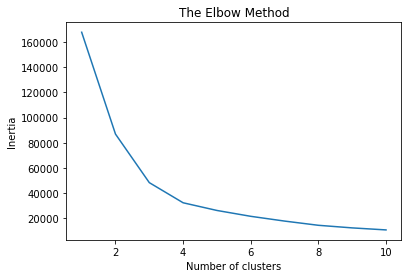

In [73]:
#Lo anterior fue con un K dado arbitrariamente. Busquemos el K más óptimo con Elbow Method
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(sindata)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [74]:
#Podemos observar que el K que mejor se ajusta es K=4
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(sindata)

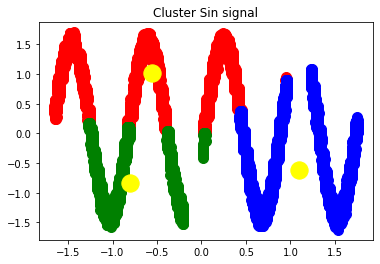

In [140]:
#Volvemos a gráficar, pero ahora con K = 4
#Visualizamos los clusters
plt.scatter(sindata[y_kmeans == 0, 0], sindata[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(sindata[y_kmeans == 1, 0], sindata[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(sindata[y_kmeans == 2, 0], sindata[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(sindata[y_kmeans == 3, 0], sindata[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster Sin signal')
plt.show()

### DBSCAN

In [78]:
#Cargamos otra vez los datos
sindata2 = pd.read_excel('Sin2.xlsx')
sindata2.head()

,58882,63168
0,58959,63322
1,59034,60585
2,59145,61717
3,59164,59757
4,59168,61401


In [121]:
#Los normalizamos
sindata2 = StandardScaler().fit_transform(sindata2)

In [122]:
#Ajustamos ahora los datos para DBSCAN, lo hacemos primero con un Epsilon y un Min cualquiera
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5)
model = dbscan.fit(sindata2)

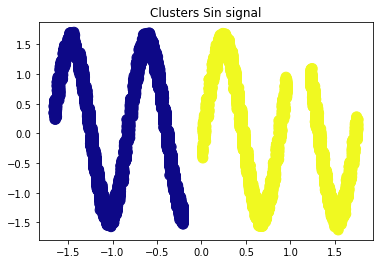

In [123]:
#Visualizamos los clusters realizados con DBSCAN
y_dbscan = dbscan.fit_predict(sindata2)
plt.scatter(sindata2[:, 0], sindata2[:, 1], s = 100, c = y_dbscan, cmap='plasma')
plt.title('Clusters Sin signal')
plt.show()

In [124]:
#Busquemos ahora el Epsilon y el Min_Point óptimos
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(sindata2)
distances, indices = nbrs.kneighbors(sindata2)

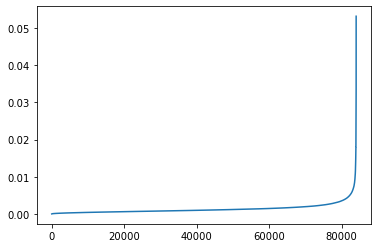

In [125]:
#Ordenamos y gráficamos
distances = np.sort(distances, axis=0)
distances2 = distances[:,1]
plt.plot(distances2)
plt.show()

In [132]:
#Ajustemos el modelo nuevamente, pero ahora con un Epsilon = 0.01
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.1, min_samples=5)
model = dbscan.fit(sindata2)

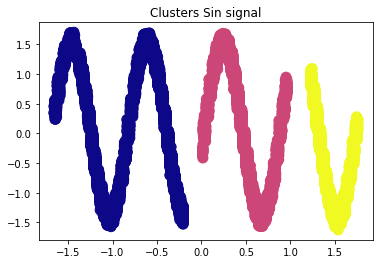

In [133]:
#Gráfiquemos nuevamente
y_dbscan = dbscan.fit_predict(sindata2)
plt.scatter(sindata2[:, 0], sindata2[:, 1], s = 100, c = y_dbscan, cmap='plasma')
plt.title('Clusters Sin signal')
plt.show()

In [137]:
#Realicemos ahora una comparación entre los dos algorimtos, K-Means y DBSCAN
labels = dbscan.labels_
print('Silhouette coefficient: %0.3f' % metrics.silhouette_score(sindata2,labels))

Silhouette coefficient: 0.269


In [139]:
labels2 = kmeans.labels_
print('Silhouette coefficient: %0.3f' % metrics.silhouette_score(sindata,labels2))

Silhouette coefficient: 0.486


## Clustering FIFA Players 

In [142]:
#Cargando los datos 
fifadata = pd.read_csv('data.csv')
fifadata.head()

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Con 2 features

In [145]:
#Extraemos las columnas que vamos a utilizar
fifadata1 = fifadata.iloc[:, [3,5]].values

In [147]:
#Verificamos que sean las correctas
fifadata1

array([[31, 94],
       [33, 94],
       [26, 92],
       ...,
       [16, 47],
       [17, 47],
       [16, 46]], dtype=int64)

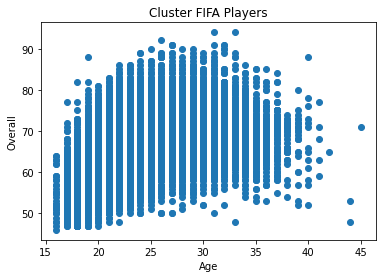

In [154]:
#Veamos rápidamente los datos seleccionados
plt.scatter(fifadata1[:,0],fifadata1[:,1])
plt.title('Cluster FIFA Players')
plt.xlabel('Age')
plt.ylabel('Overall')
plt.show()

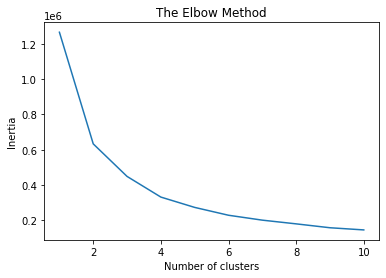

In [148]:
#Primero busquemos el K que mejor se ajusta
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(fifadata1)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [149]:
#Ajustamos el modelo para K = 4
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(fifadata1)

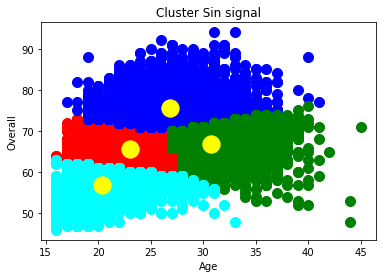

In [151]:
#Gráficamos los clusters
plt.scatter(fifadata1[y_kmeans == 0, 0], fifadata1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(fifadata1[y_kmeans == 1, 0], fifadata1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(fifadata1[y_kmeans == 2, 0], fifadata1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(fifadata1[y_kmeans == 3, 0], fifadata1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster FIFA Players')
plt.xlabel('Age')
plt.ylabel('Overall')
plt.show()